# **a3-210010073**

# **Fluid Mechanics Assignment 3**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

We are going to consider flow past a circular cylinder. For obtaining its complex potential , we superimpose the complex potential for doublet and complex potential for free stream 
$$\boxed{\Phi(z) = U_{\infty}z + \frac{\mu}{2\pi z}}$$Where $U_{\infty}$ is free stream velocity and $\mu$ is doublet strength where doublet is aligined along -ve x axis and free stream along +ve x direction(**From left side**). <br>
Considering R to be the radius of the cylinder, the complex potential is 
$$\boxed{\Phi(z) = U_{\infty}z + \frac{U_{\infty}\mathbf{R^2}}{z}}$$
Where $\mathbf{R}=\sqrt{\frac{\mu}{2\pi U_{\infty}}}$ which is taken as 1m.

## Question 1
$\mathbf{C_p}$ and Velocity magnitude as a function of $\theta$ on the surface of the cylinder.


We know that $$C_p = \frac{P - P_{\infty}}{\frac{1}{2}\rho U_{\infty}^2}$$ and from bernoulis equation for identical streamlines we can say that 
$$ P - P_{\infty} = \frac{1}{2} \rho ( U_{\infty}^2 - V^2 )$$
$$C_p =1- \frac{V^2}{U_{\infty}^2}$$
From complex potential we have $$\vec{V} = \mathcal{Re}(\frac{d\Phi}{dz})\hat{i} - \mathcal{Im}(\frac{d\Phi}{dz})\hat{j}$$
And hence we have :
$$V^2 = |\frac{d\Phi}{dz}|^2 = U_{\infty}^2(1 - \frac{\mathbf{R}^2}{z^2})(1-\frac{\mathbf{R}^2}{\bar{z}^2})$$
The above expression is useful in computing surface velocity magnitude and for this problem we are restricting |z| to be R which is 1m and then our expression for $C_p(\theta)$ becomes :
$$C_p(\theta) =1- (1 - \frac{\mathbf{R}^2}{z^2})(1-\frac{\mathbf{R}^2}{\bar{z}^2})$$
where $z = e^{i \theta}$ and $\bar{z} = e^{-i\theta}$ where $i = \sqrt{-1}$

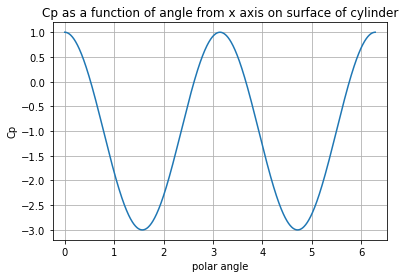

In [2]:
theta = 2*np.pi*np.linspace(0,1,1001)
a =1
z = a*np.e**((1j)*theta)
z_b =a*np.e**((-1j)*theta)
Cp_dum= 1- (1 - 1/z**2)*(1-1/z_b**2)
Cp = np.real(Cp_dum)
plt.plot(theta,Cp)
plt.xlabel("polar angle")
plt.ylabel("Cp")
plt.title("Cp as a function of angle from x axis on surface of cylinder")
plt.grid()
plt.axis("equal")
plt.show()

As we can observe that Cp is minimum on the y axis extremas of the circular C.S $x^2 + y^2 =1$ at $\theta  = \frac{\pi}{2} $ or  $\theta  = \frac{3\pi}{2} $  indicating points of maximum speed and Cp peaks at x axis extremas of the circular CS indicating points of **flow stagnation** . Now asuming free stream velocity to be 1m/s we can plot the velocity magnitude as function of $\theta$.
$$V(\theta) = \sqrt{(1 - \frac{\mathbf{R}^2}{z^2})(1-\frac{\mathbf{R}^2}{\bar{z}^2})}$$

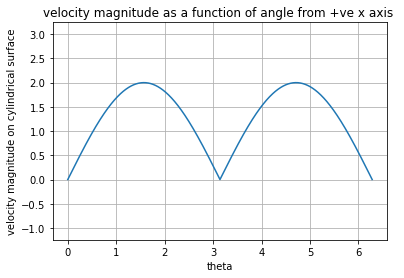

In [3]:
theta = 2*np.pi*np.linspace(0,1,1001)
uinf2=1 #square of U inf
z = np.e**((1j)*theta)
z_b =np.e**((-1j)*theta)
V_dum= uinf2*(1 - 1/z**2)*(1-1/z_b**2)
V =np.sqrt( np.real(V_dum))
plt.plot(theta,V)
plt.xlabel("theta")
plt.ylabel("velocity magnitude on cylindrical surface")
plt.title("velocity magnitude as a function of angle from +ve x axis ")
plt.grid()
plt.axis("equal")
plt.show()

We can see the velocity peaks and stagnation points located at the same points we discussed before

## Question 2 and 3 
Adding a point vortex 

Once we add a point vortex of strength $\Gamma$ , the complex potential becomes as follows :
$$\Phi(z) = U_{\infty}z + \frac{\mu}{2\pi z} + \frac{-i\Gamma}{2\pi}ln(z)$$
Here we have the radius of cylinder to be 1m and the strength $\Gamma$ to be a variable

In [30]:
x,y = np.mgrid[-2:2:1000j,-2:2:1000j]
z = x + (1j)*y
condi = x**2 + y**2 <= 1
def streamline(gbt):
    #gamma by two pi 
    Phi = z + 1/z - (1j)*gbt*np.log(z)
    #phi = np.real(Phi)
    psi =np.imag(Phi)
    psi[condi] = 0
    plt.contour(x,y,psi,levels=15)
    plt.xlabel("x")
    plt.ylabel("y")
    




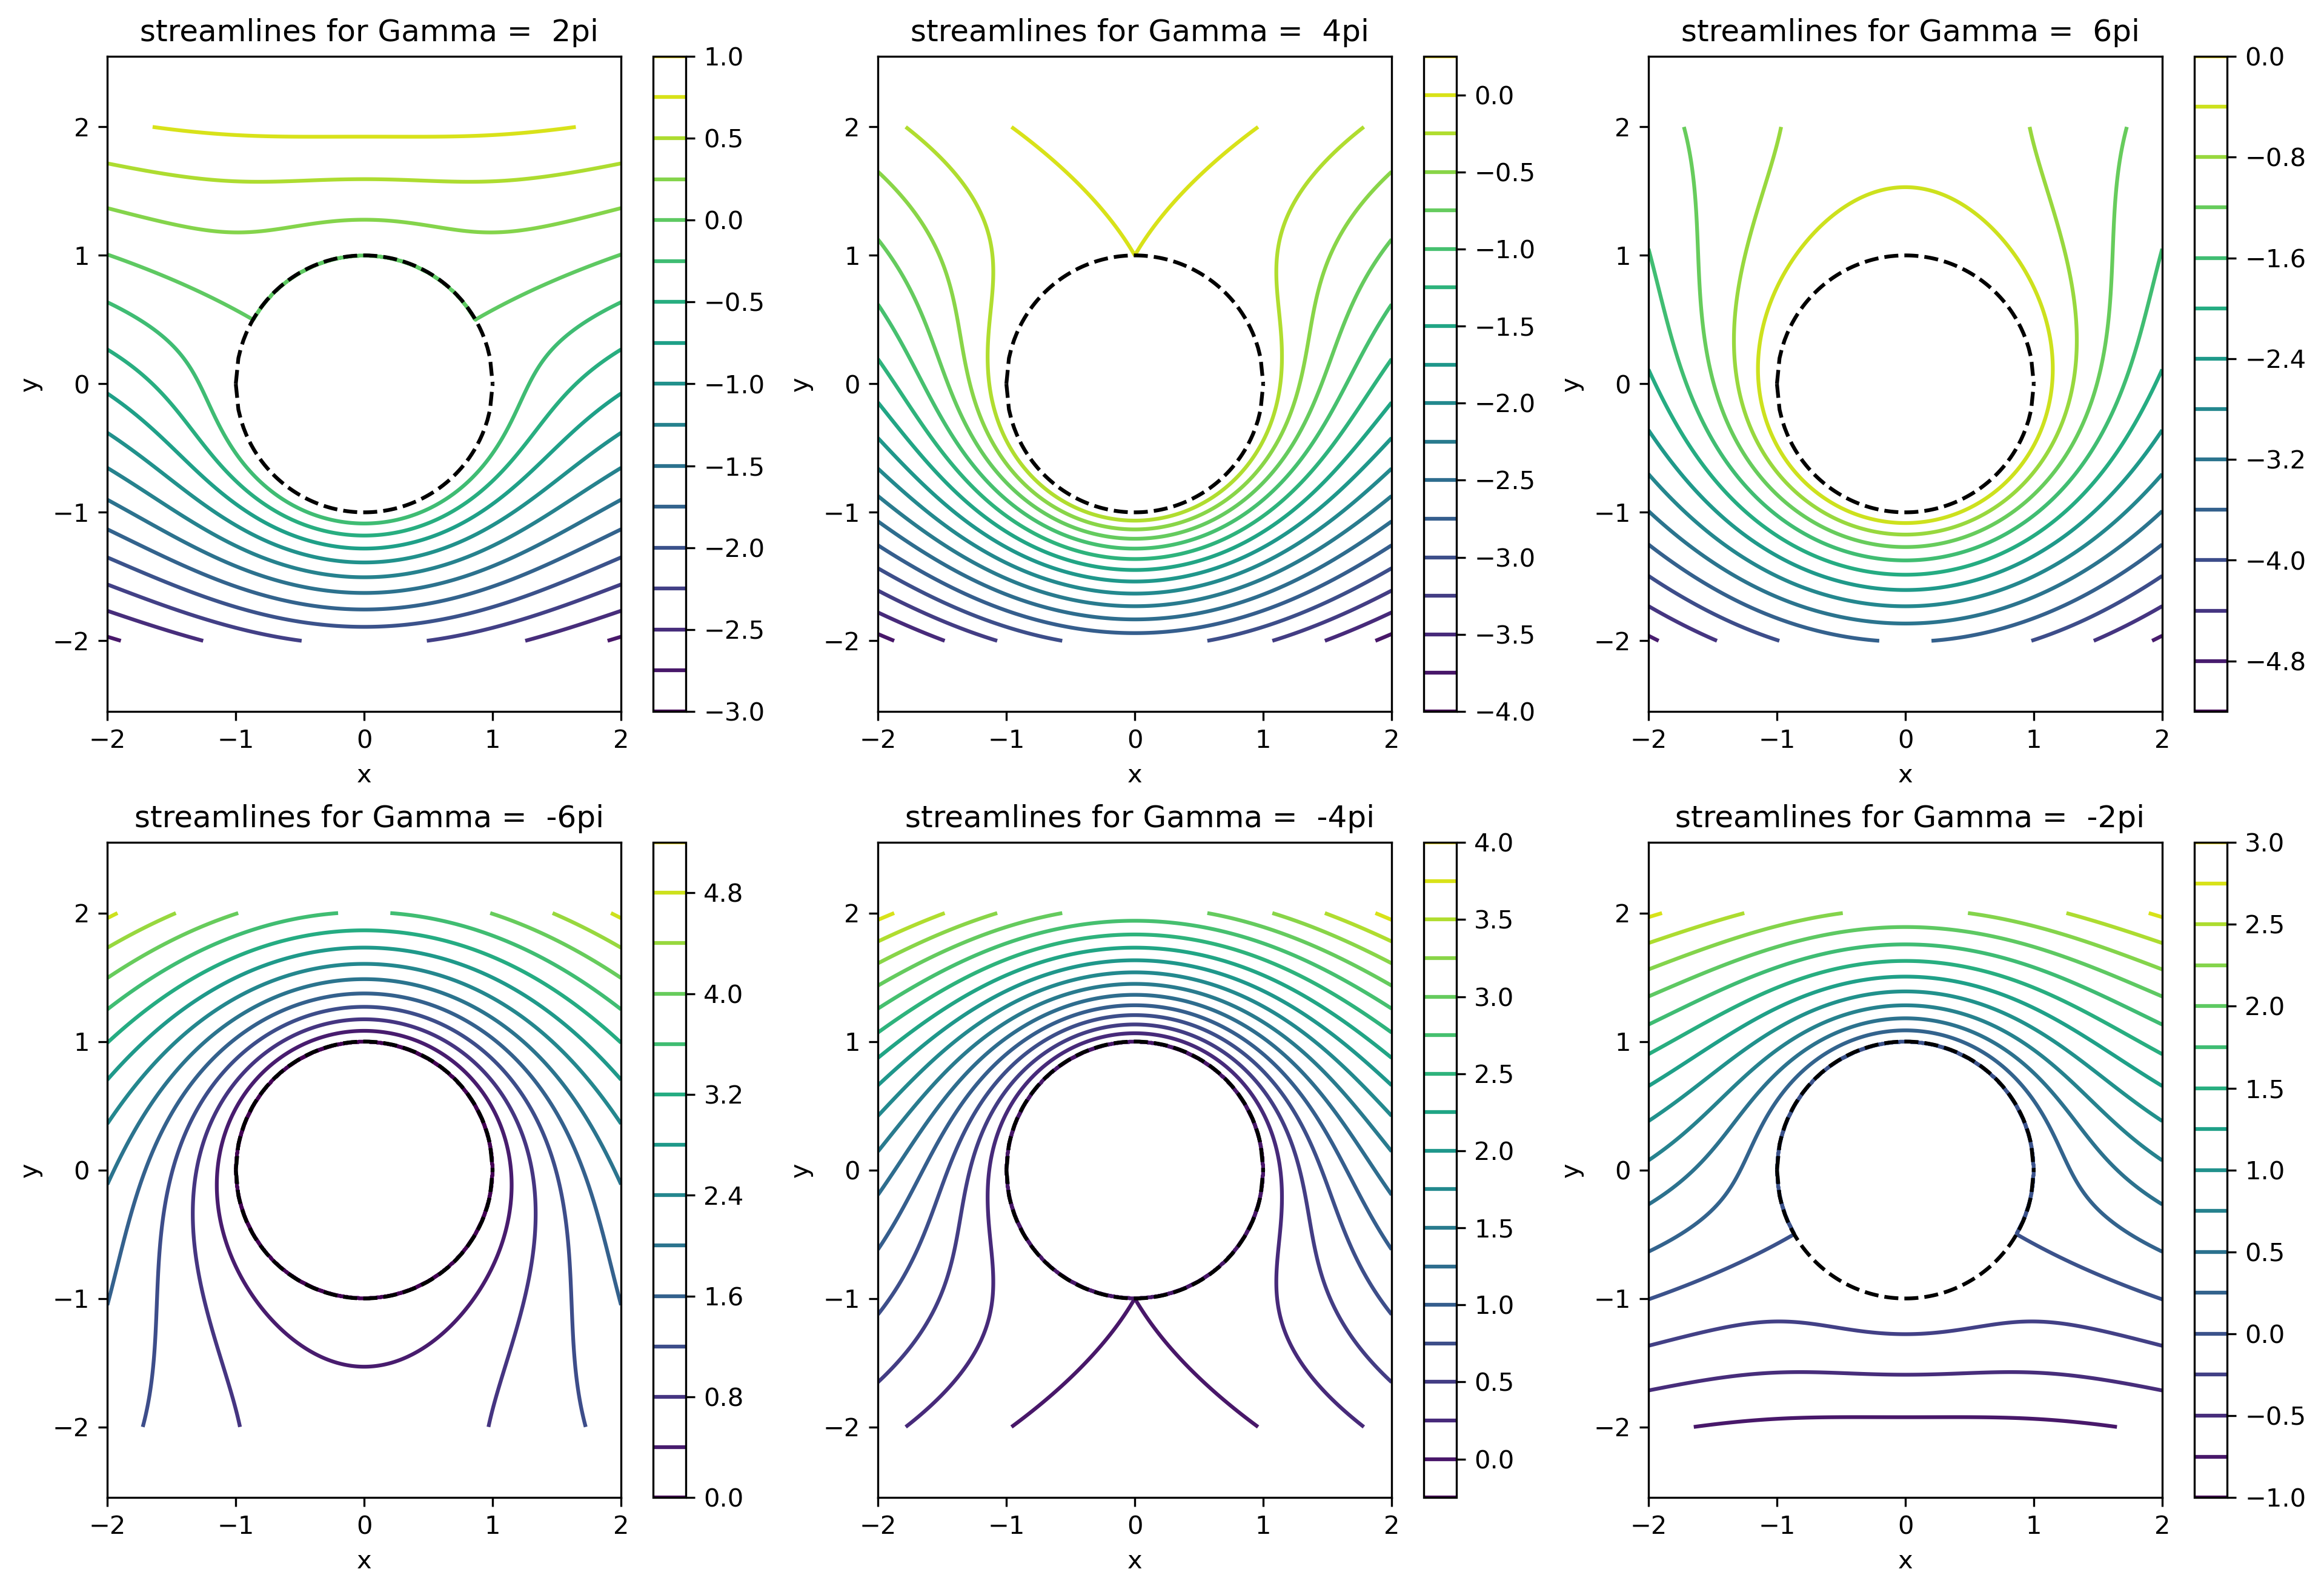

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(15.5,10.5),dpi=300)

plt.subplot(2,3,1)
streamline(1)
plt.colorbar()
plt.title(" streamlines for Gamma =  2pi")
plt.axis("equal")
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')

plt.subplot(2,3,2)
streamline(2)
plt.colorbar()
plt.title(" streamlines for Gamma =  4pi")
plt.axis("equal")
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')  

plt.subplot(2,3,3)
streamline(3)
plt.colorbar()
plt.title(" streamlines for Gamma =  6pi")
plt.axis("equal")
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')  

plt.subplot(2,3,4)
streamline(-3)
plt.colorbar()
plt.title(" streamlines for Gamma =  -6pi")
plt.axis("equal")
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')  

plt.subplot(2,3,5)
streamline(-2)
plt.colorbar()
plt.title(" streamlines for Gamma =  -4pi")
plt.axis("equal")
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')  

plt.subplot(2,3,6)
streamline(-1)
plt.colorbar()
plt.title(" streamlines for Gamma =  -2pi")
plt.axis("equal")
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')  

plt.show()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

You can see the stagnation points shifing upwards and downwards

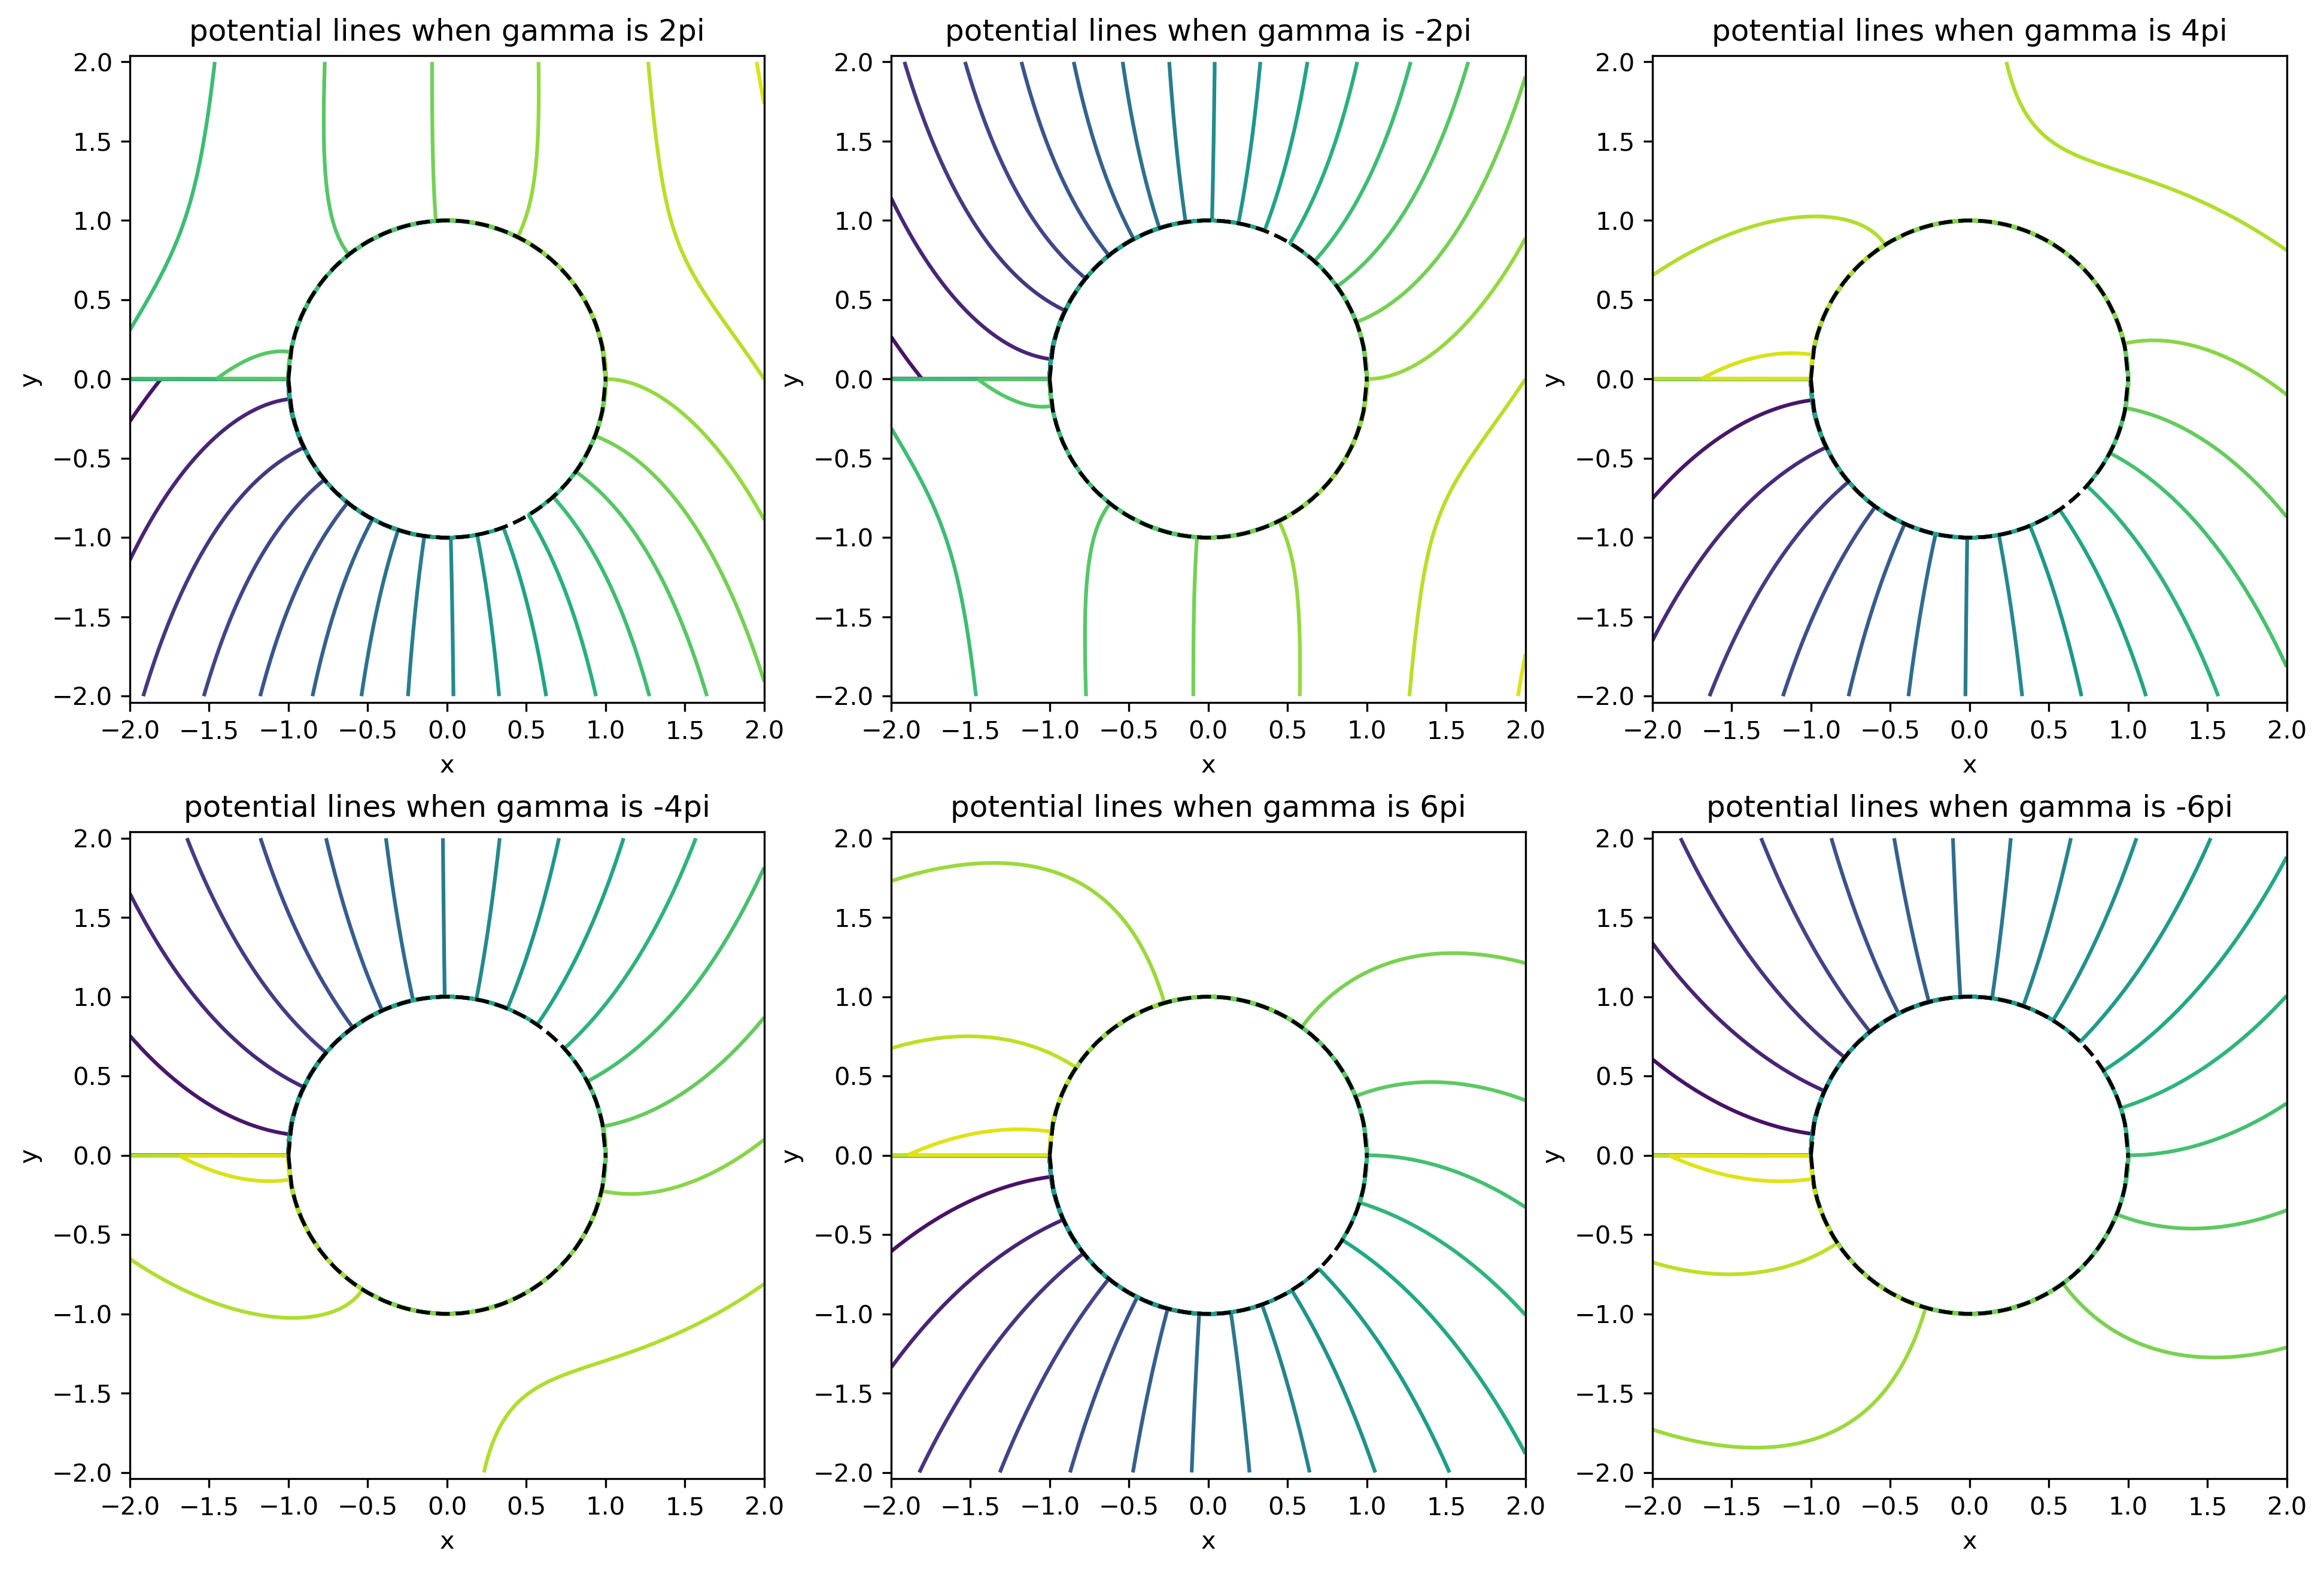

<Figure size 432x288 with 0 Axes>

In [36]:
def potentialline(gbt):
    #gamma by two pi
    x,y = np.mgrid[-2:2:1000j,-2:2:1000j]
    z = x + (1j)*y
    condi = x**2 + y**2 <= 1
    Phi = z + 1/z - (1j)*gbt*np.log(z)
    phi = np.real(Phi)
    #psi =np.imag(Phi)
    phi[condi] = 0
    plt.contour(x,y,phi,levels=20)
    #plt.title("potential lines")
    a = np.linspace(-1,1,100)
    b = np.sqrt(1-a**2)
    plt.plot(a,b,'--k')
    plt.plot(a,-b,'--k')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    #plt.show()
plt.figure(figsize=(15.5,10.5),dpi=300)

plt.subplot(2,3,1)
potentialline(1)
plt.title("potential lines when gamma is 2pi")

plt.subplot(2,3,2)
potentialline(-1)
plt.title("potential lines when gamma is -2pi")

plt.subplot(2,3,3)
potentialline(2)
plt.title("potential lines when gamma is 4pi")

plt.subplot(2,3,4)
potentialline(-2)
plt.title("potential lines when gamma is -4pi")

plt.subplot(2,3,5)
potentialline(3)
plt.title("potential lines when gamma is 6pi")

plt.subplot(2,3,6)
potentialline(-3)
plt.title("potential lines when gamma is -6pi")

plt.show()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


above u can see the variation potential lines wrt circulation ($\Gamma$) values

## Question 4
Pressure field

For calculating the pressure field we need velocity magnitude and from the complex analysis of flows we have 
$$V =|\frac{d\Phi}{dz}|= U_{\infty}\sqrt{(1 - \frac{\mathbf{R}^2}{z^2} -\frac{i\Gamma}{2\pi z})(1 - \frac{\mathbf{R}^2}{\bar{z}^2} +\frac{i\Gamma}{2\pi \bar{z}})}$$
where we assume free stream velocity to be 1m/s and R is 1m and z =x+iy according to our coordinate syste. We assume $P_{\infty}$ to be 10 units and $\rho$ to be 2 units. Then by bernoulis equation the pressure field is given by 
$$P(x,y,z) = P_{\infty} + \frac{1}{2}\rho(U_{\infty}^2 - V^2)$$

In [33]:
x,y = np.mgrid[-2:2:400j,-2:2:400j]
z = x + (1j)*y
z_b = x - (1j)*y
cond = x**2 + y**2 < 1
def pressureplt(gbt):
    V=np.sqrt((1-1/z**2 - (1j)*gbt/z)*(1 -1/z_b**2 + (1j)*gbt/z_b))
    V[cond]=100
    P= 10 + (1 - (np.real(V))**2)
    plt.contourf(x,y,P,np.linspace(-15,15,80),cmap='plasma')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.colorbar()

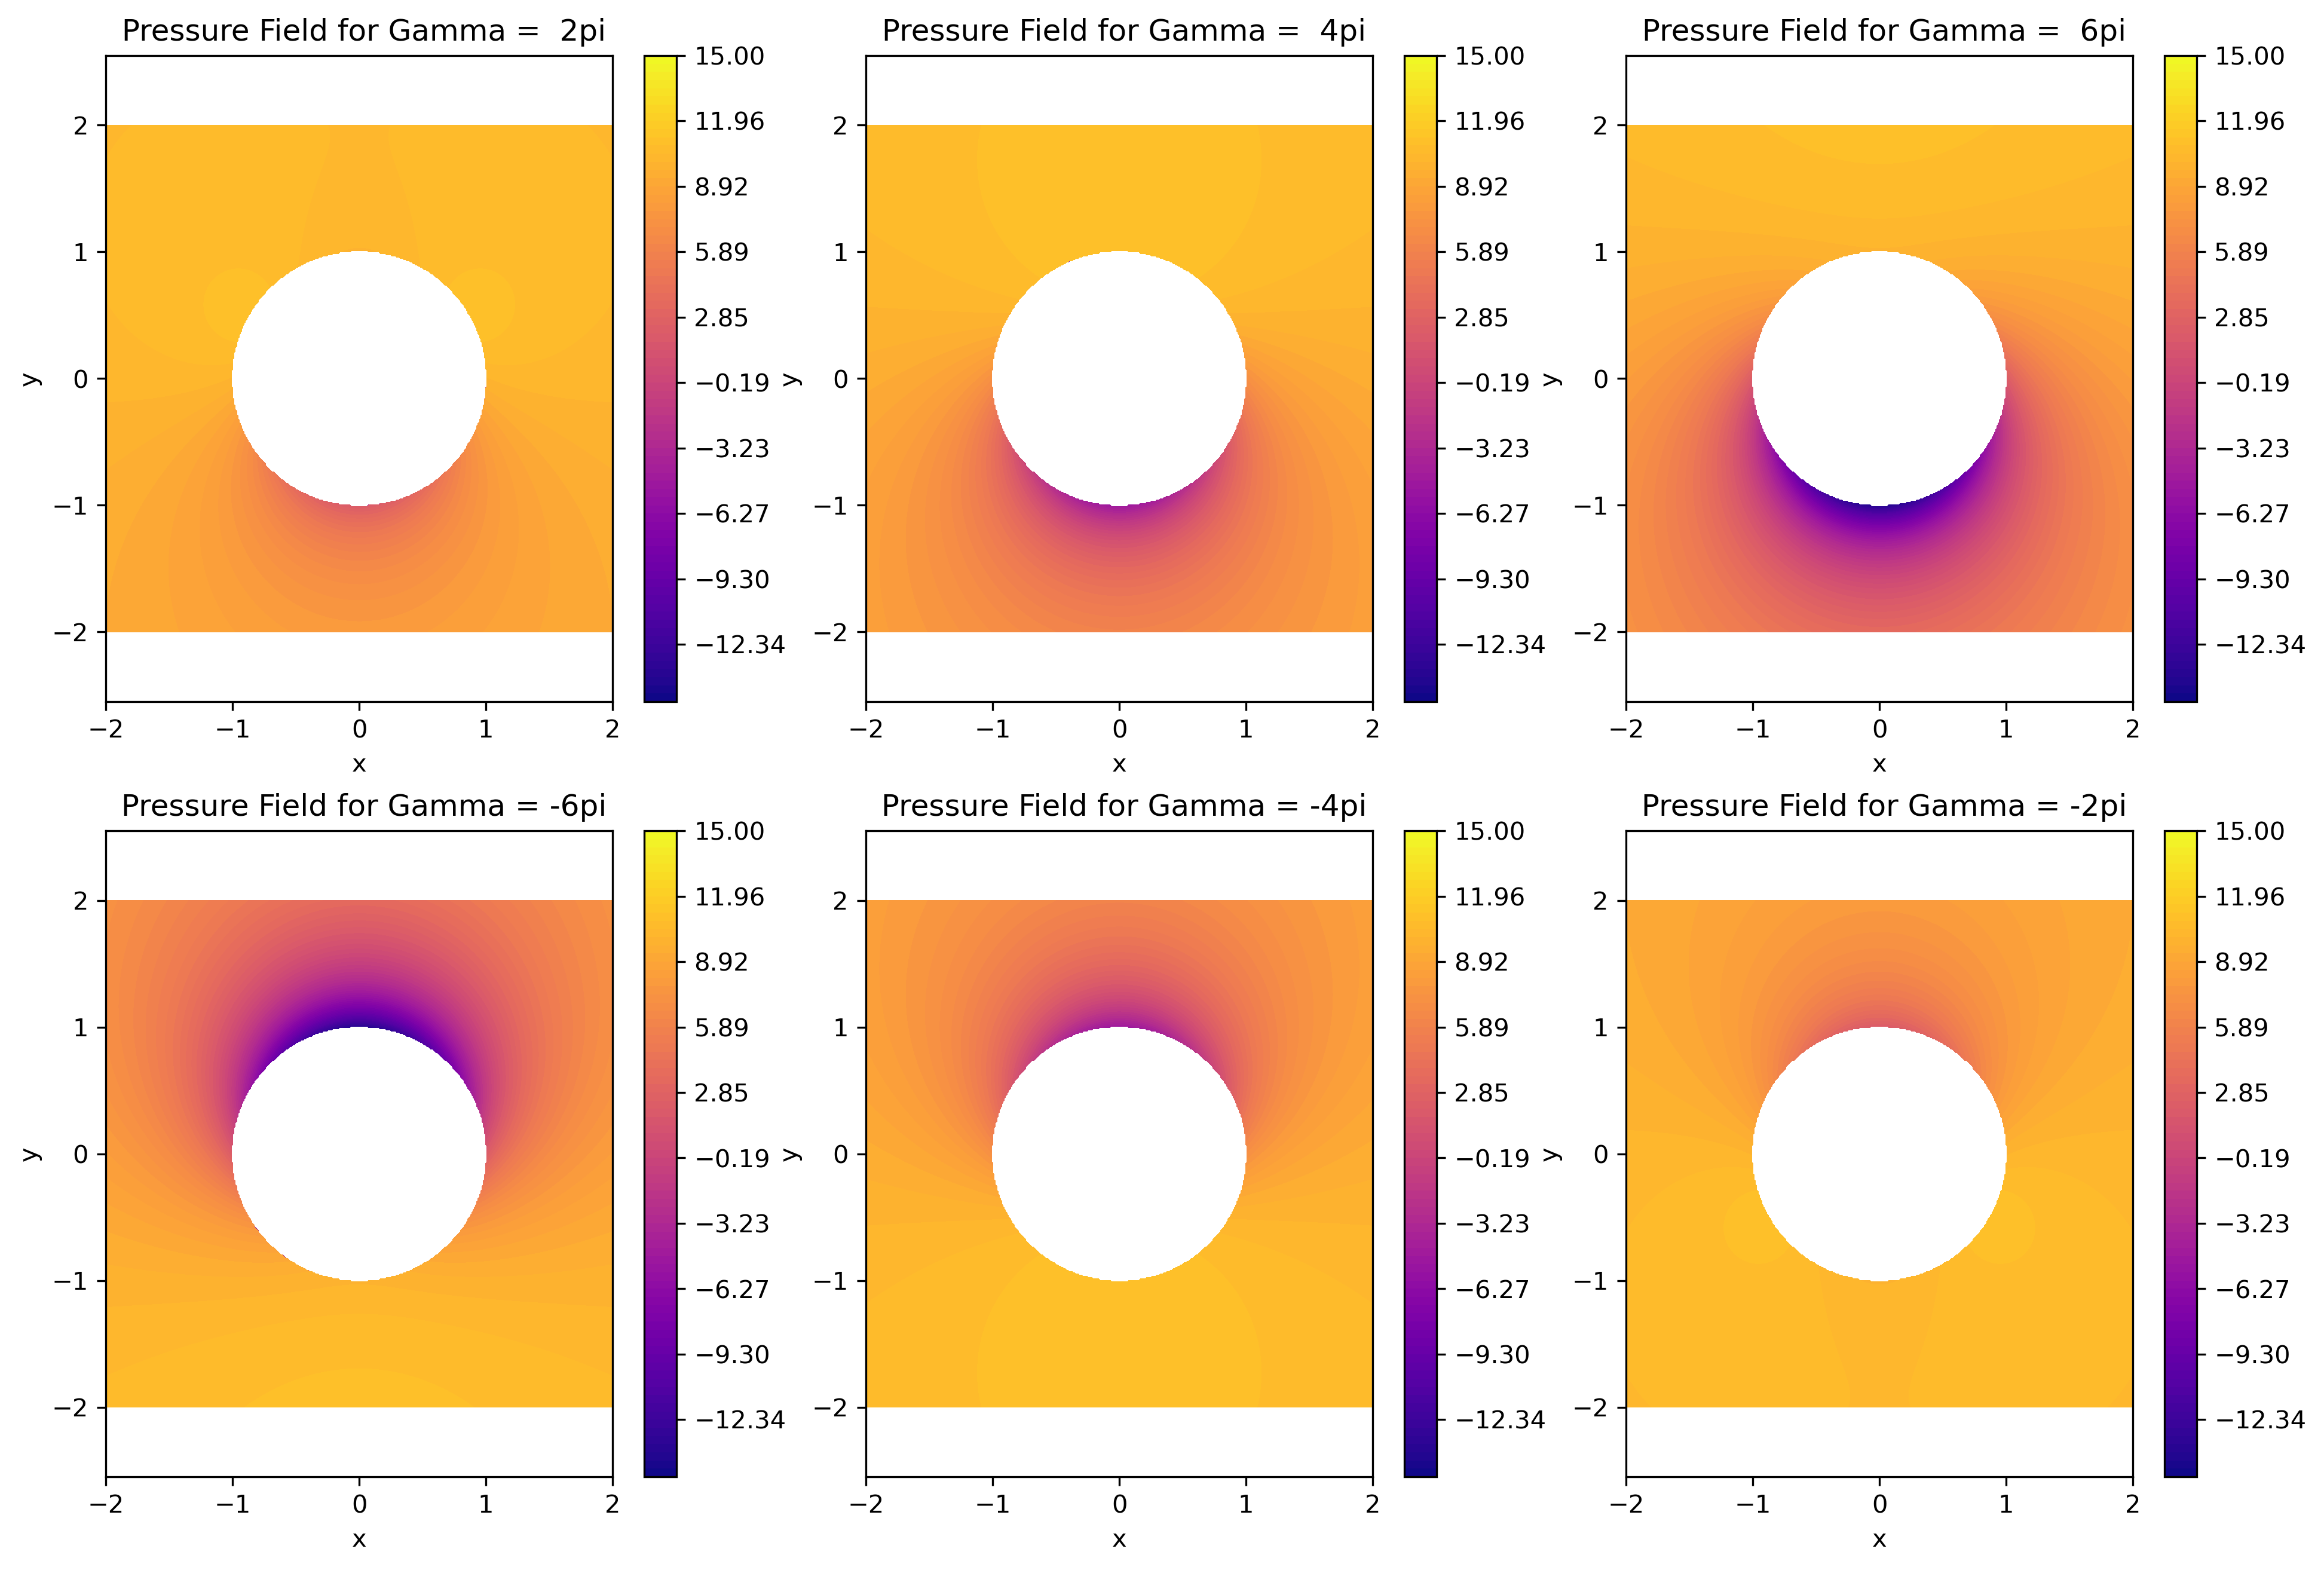

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(15.5,10.5),dpi=300)
plt.subplot(2,3,1)
pressureplt(1)
plt.title(" Pressure Field for Gamma =  2pi")

plt.subplot(2,3,2)
pressureplt(2)
plt.title(" Pressure Field for Gamma =  4pi")

plt.subplot(2,3,3)
pressureplt(3)
plt.title(" Pressure Field for Gamma =  6pi")

plt.subplot(2,3,4)
pressureplt(-3)
plt.title(" Pressure Field for Gamma = -6pi")

plt.subplot(2,3,5)
pressureplt(-2)
plt.title(" Pressure Field for Gamma = -4pi")

plt.subplot(2,3,6)
pressureplt(-1)
plt.title(" Pressure Field for Gamma = -2pi")

plt.show()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In the above plots , the <B><font color=#8A2BE2>Blue-Violet </font></B>areas are of that of low pressure and $\color{orange}{\text{yellow}}$ areas are that of high pressure . So the Forces are in the direction of highest pressure to highest pressure

## Question 5 and 6
Velocity distribution and Cp distribution

Both the above distributions are functions of $\theta$ plotted on the surface of the cylinder of radius R. Assuming free stream velocity to be 1m/s and we have :
$$V(\theta) = U_{\infty}\sqrt{(1 - \frac{\mathbf{R}^2}{z^2} -\frac{i\Gamma}{2\pi U_{\infty} z})(1 - \frac{\mathbf{R}^2}{\bar{z}^2} +\frac{i\Gamma}{2\pi U_{\infty} \bar{z}})}$$ 
where z = $e^{i\theta}$ and $\bar{z} = e^{-i\theta}$
and correspondingly the Cp as a function of theta goes as 
$$\mathbf{C}_p(\theta) = 1 - \dfrac{V^2(\theta)}{U_{\infty}^2}$$

In [40]:
theta = 2*np.pi*np.linspace(0,1,1001)
z = np.e**((1j)*theta)
z_b =np.e**((-1j)*theta)
def Vel_mag(gbt):
    V=np.sqrt((1-1/z**2 - (1j)*gbt/z)*(1 -1/z_b**2 + (1j)*gbt/z_b))
    plt.plot(theta,np.real(V))
    plt.xlabel('theta')
    plt.ylabel('|v|')
    #plt.title("gamma = 2pi x gbt_ /4")
    plt.grid()
    plt.axis("equal")

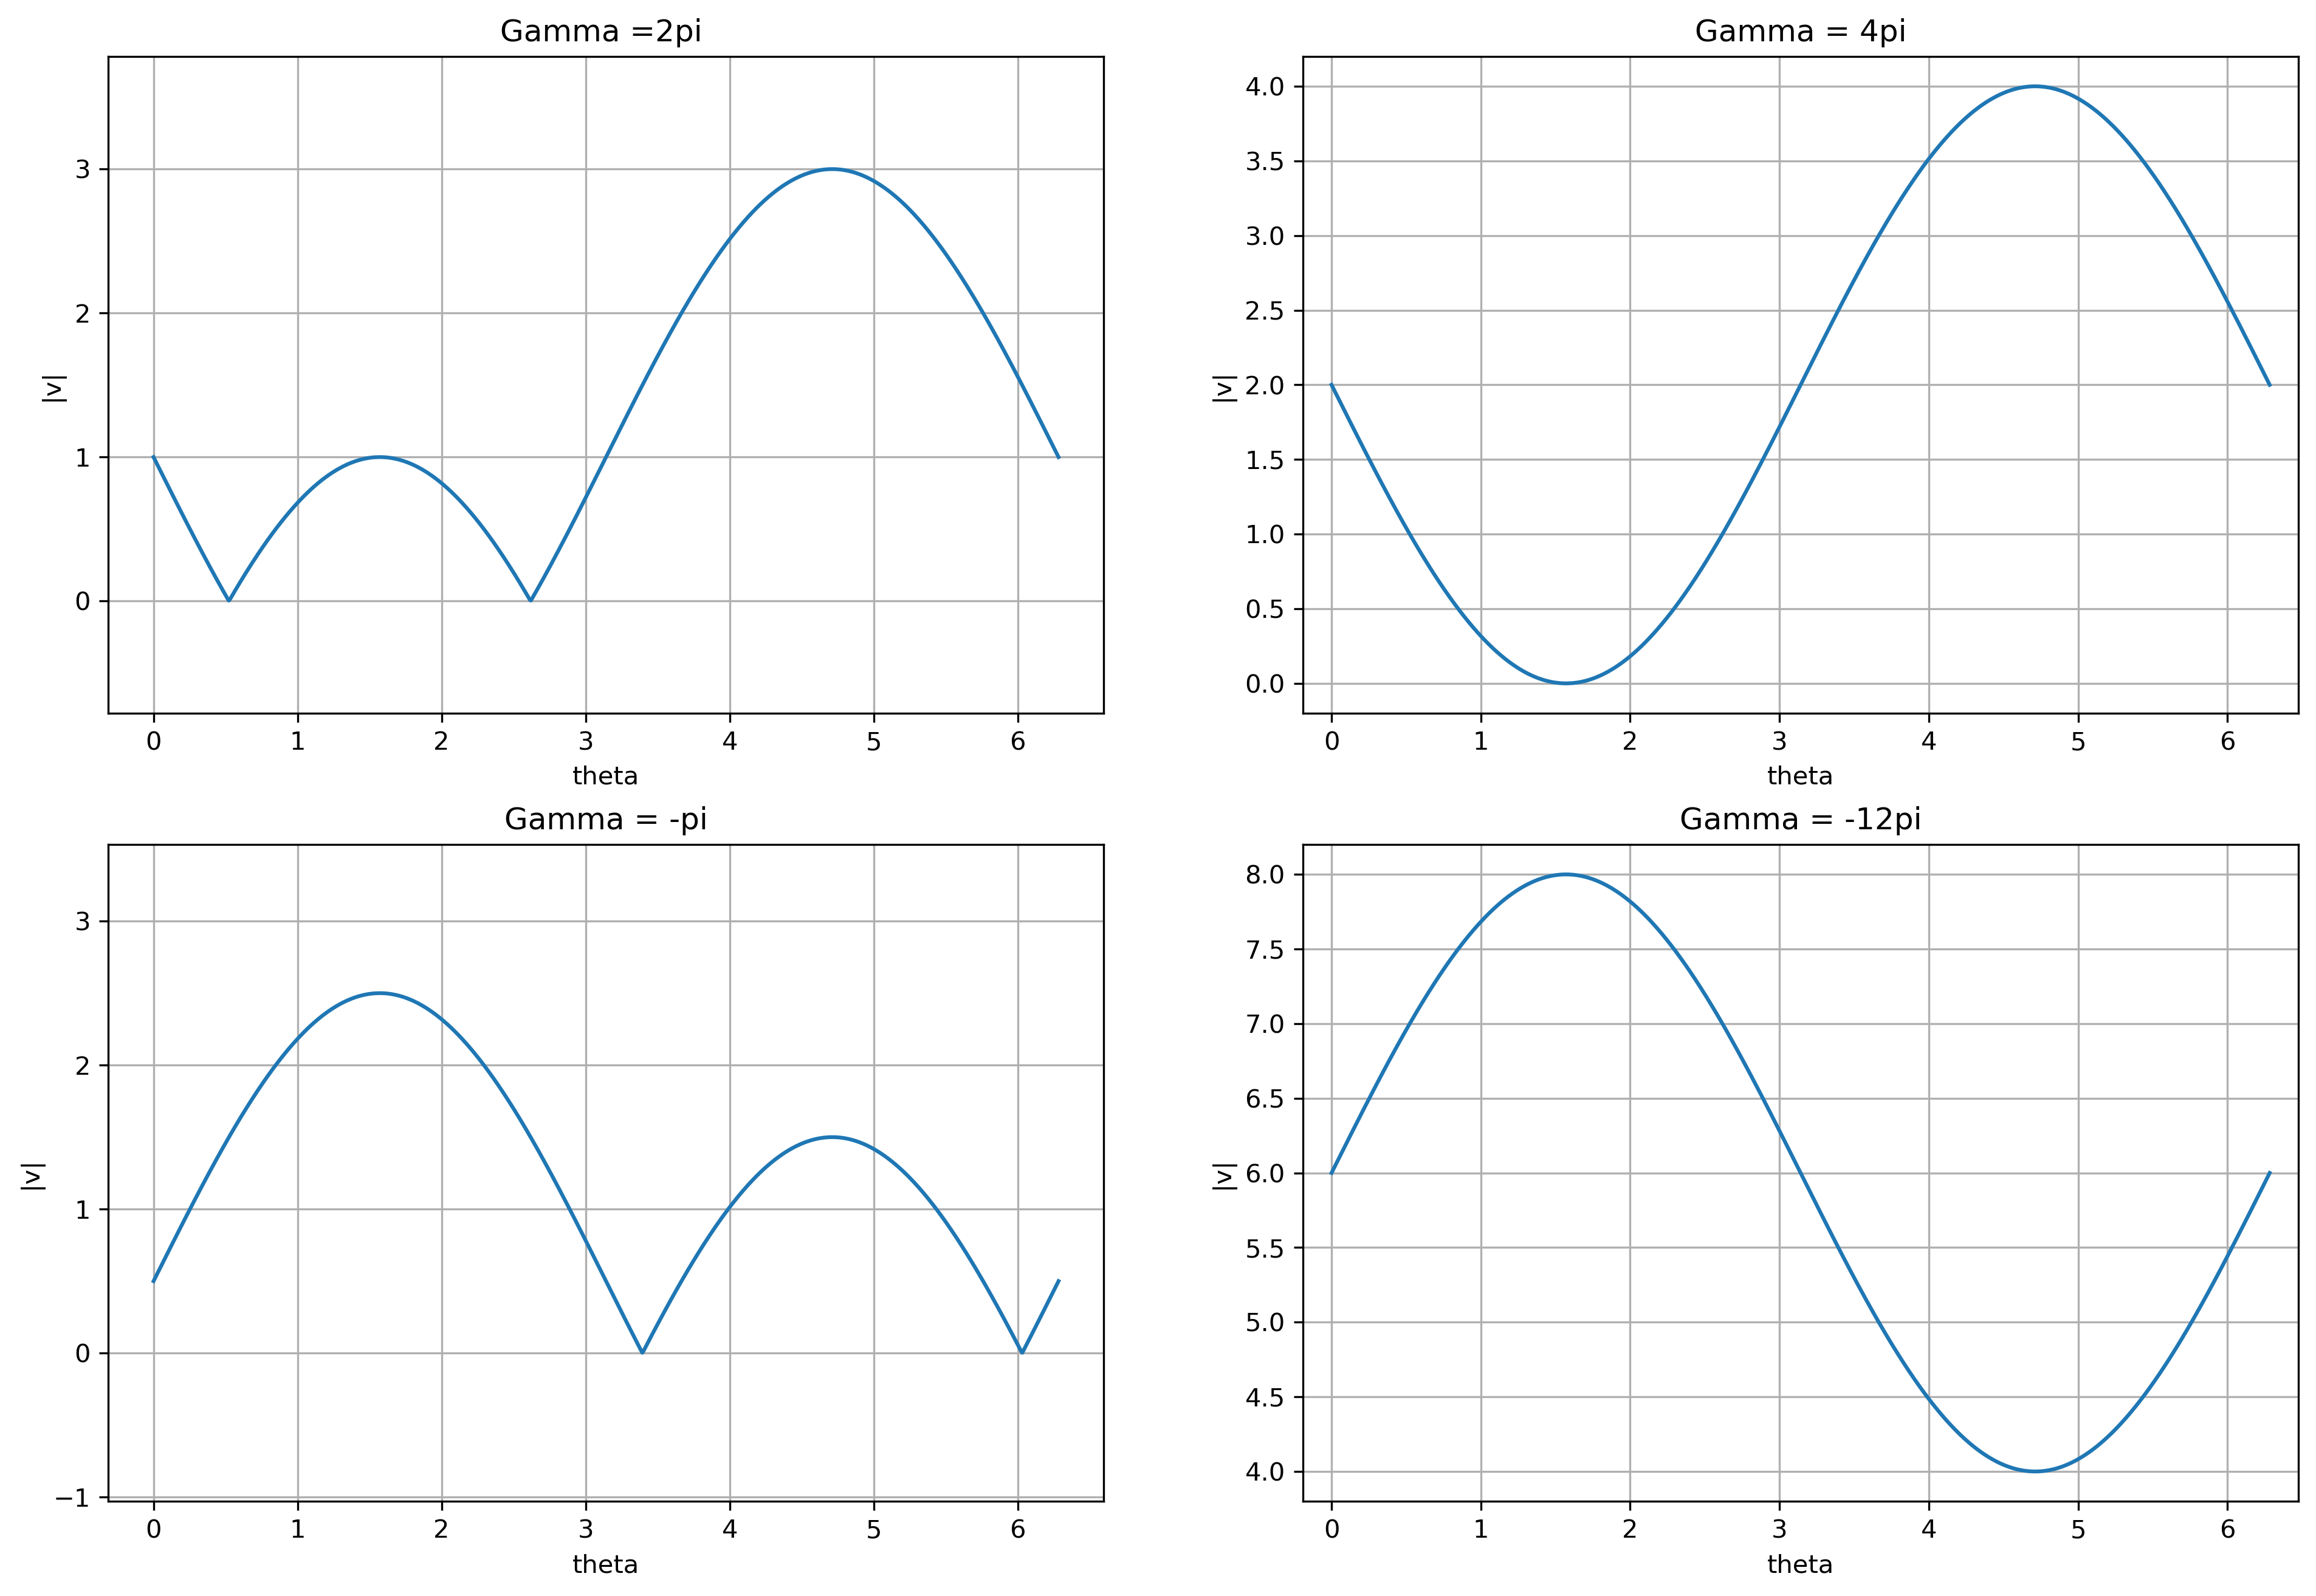

<Figure size 432x288 with 0 Axes>

In [44]:
#interact(Vel_mag,gbt_=(-20,20))
plt.figure(figsize=(15.5,10.5),dpi=300)
plt.subplot(2,2,1)
Vel_mag(1)
plt.title("Gamma =2pi ")

plt.subplot(2,2,2)
Vel_mag(2)
plt.title("Gamma = 4pi")

plt.subplot(2,2,3)
Vel_mag(-0.5)
plt.title("Gamma = -pi")

plt.subplot(2,2,4)
Vel_mag(-6)
plt.title("Gamma = -12pi")

plt.show()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

Its interesting to note that once the circulation magnitude exceeds $4\pi$ , the velocity magnitude never attains zero hence no stagnation point

Now lets see Cp plot:

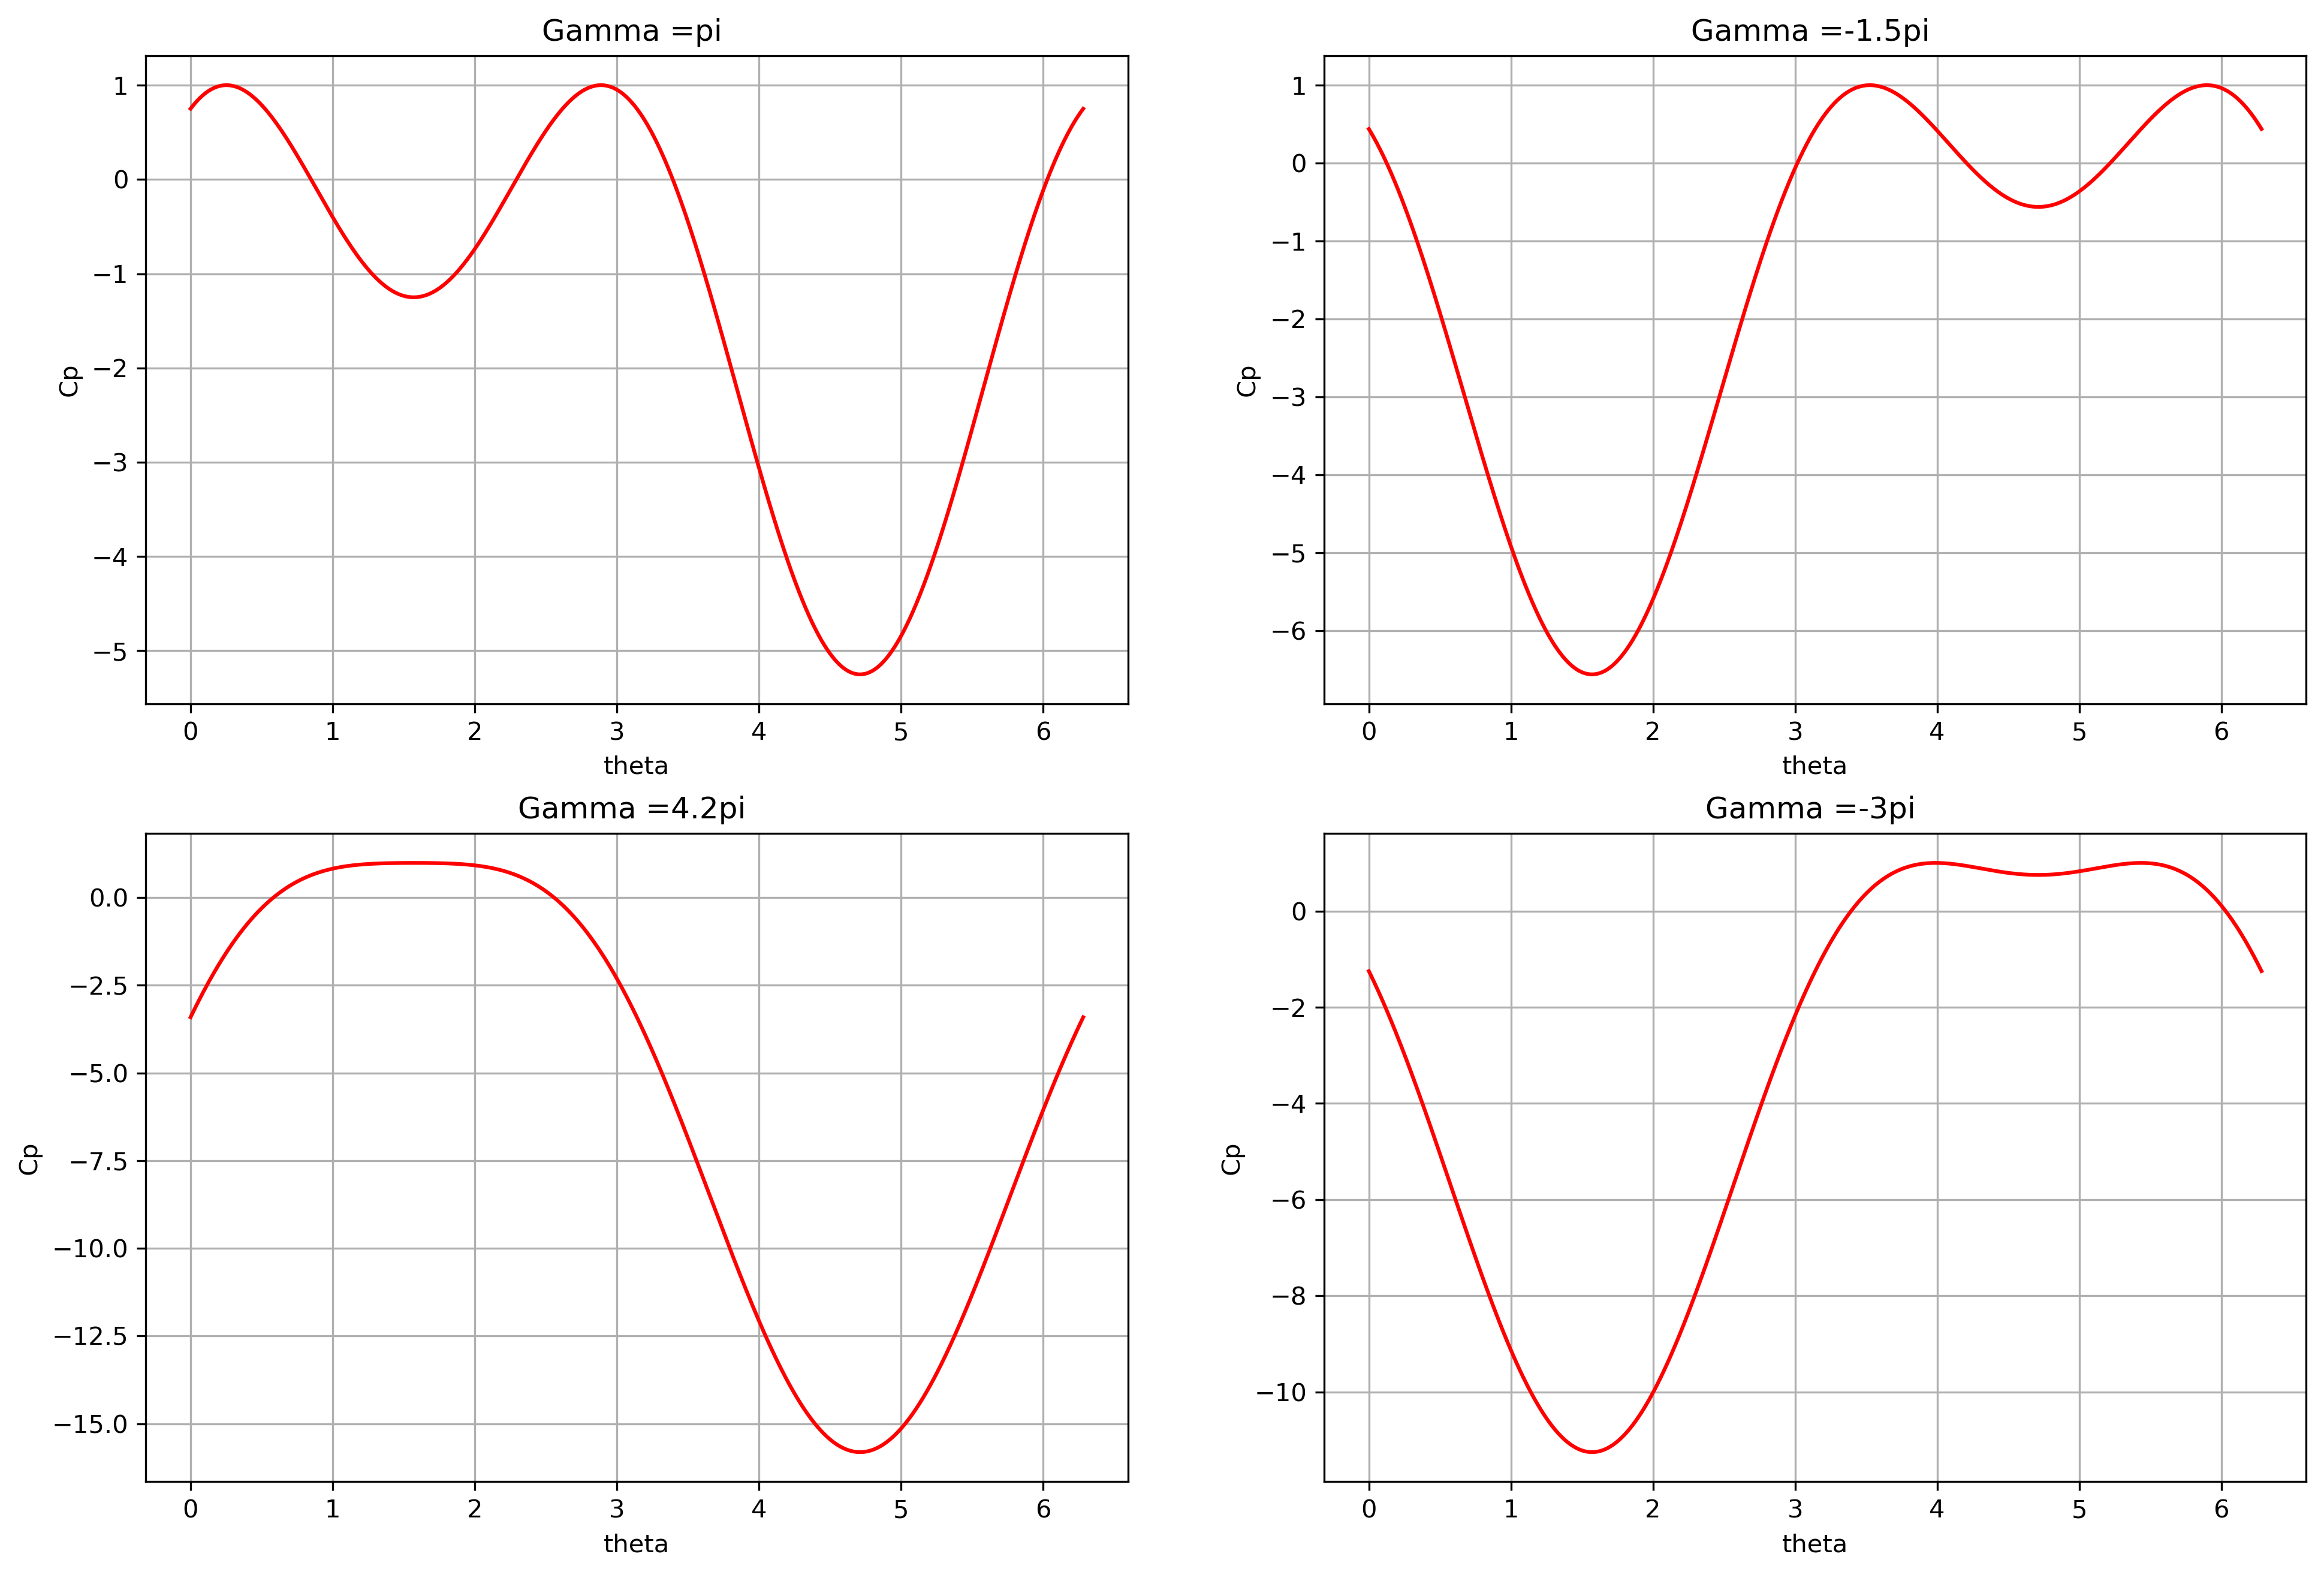

In [48]:
theta = 2*np.pi*np.linspace(0,1,1001)
z = np.e**((1j)*theta)
z_b =np.e**((-1j)*theta)
def Cpfpc(gbt):
    V2=np.real((1-1/z**2 - (1j)*gbt/z)*(1 -1/z_b**2 + (1j)*gbt/z_b))
    P = 1 - V2
    plt.plot(theta,P,"r-")
    plt.xlabel('theta')
    plt.ylabel('Cp')
    #plt.title("gamma = 2pi x gbt_ /10")
    plt.grid()
    #plt.axis("equal")
#interact(Cpfpc,gbt_=(-20,20))

plt.figure(figsize=(15.5,10.5),dpi=300)
plt.subplot(2,2,1)
Cpfpc(0.5)
plt.title("Gamma =pi ")

plt.subplot(2,2,2)
Cpfpc(-0.75)
plt.title("Gamma =-1.5pi ")

plt.subplot(2,2,3)
Cpfpc(2.1)
plt.title("Gamma =4.2pi ")

plt.subplot(2,2,4)
Cpfpc(-1.5)
plt.title("Gamma =-3pi ")

plt.show()

Interact with the above plot to see how Cp vs angle changes accodring to gamma 

## Question 7
Lift and Drag

Considering free stream velocity to be 1m/s and density to be 2 units Radius R =1 and length of cylinder to be $\mathcal{l}$ , lets take $\frac{\Gamma}{2\pi U_{\infty}} = d$ so our pressure field on surface of the cylinder becomes :
$$P(\theta) = P_{\infty} + \frac{1}{2}\rho U^2_{\infty} -\rho U^2_{\infty} (1 + \frac{d^2}{2} - 2d sin(\theta) - cos(2\theta))$$
So for calculating the lift(L) and drag(D) on the cylinder we have to do the integral :
$$ L(\Gamma) = -\oint_{0}^{2\pi}P(\theta)sin(\theta)Rld\theta = -\oint_{0}^{2\pi}\frac{1}{2}\rho U^2_{\infty} C_p(\theta)sin(\theta)Rld\theta$$ and 
$$ D(\Gamma)= -\oint_{0}^{2\pi}P(\theta)cos(\theta)Rld\theta  = -\oint_{0}^{2\pi}\frac{1}{2}\rho U^2_{\infty} C_p(\theta)cos(\theta)Rld\theta$$ 
Evaluating these integrals by eliminating $\theta$ invariant terms and using orthogonality properties , we finally have 
$$D(\Gamma) = 0 $$
$$L(\Gamma) = -\rho Rl U_{\infty} \Gamma $$
Now lets plot lift as a function of circulation: Note :**Positive circulation is anti clockwise and positve lift is upward**

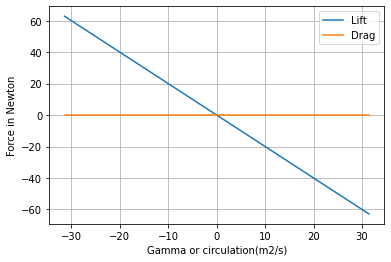

In [11]:
rho =2
R = 1
l=1
uinf =1
circulation = 2*np.pi*np.linspace(-5,5,101)
Lift = - rho *R * l* uinf * circulation
Drag = 0*circulation
plt.plot(circulation,Lift)
plt.plot(circulation,Drag)
plt.legend(["Lift","Drag"])
plt.xlabel("Gamma or circulation(m2/s)")
plt.ylabel("Force in Newton")
plt.grid()
plt.show()
